In [2]:
%load_ext autoreload
%autoreload 2


from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import embedder_generator as emb_gen
import networkx as nx
import numpy as np
import utilities 

In [5]:
def load_generated_data_classification(path):
    
    graphs = nx.read_gpickle(path+'/'+'graphs.gpickle')
    
    labels = list(np.load(path+'/'+'labels.npy'))
    
    _, count = np.unique(labels,return_counts=True)
    
    print("Negative samples: ",count[0])
    print("Positive samples: ",count[1])
    
    return (graphs,labels)

In [6]:
graphs, labels = load_generated_data_classification("generate_graphs/624249_pos_neg")

Negative samples:  136
Positive samples:  256


In [7]:
for g in graphs:
    for node in g.nodes():
        g.nodes[node]['vec'] = []
for g in graphs:
    for edge in g.edges():
        g.edges[edge]['vec'] = []

In [8]:
vec_vet_nbits = 4
graphs = utilities.add_info_to_nodes(graphs,[utilities.vec_vertex],param=vec_vet_nbits)

In [9]:
max_n_nodes,n_attributes = utilities.find_shapes(graphs)

In [10]:
print(n_attributes)
print(max_n_nodes)

16
42


### BaseLine SPK

In [11]:
from embedder import Embedder
from embedder import Kernel_GNN
from embedder import Transformer
from umap import UMAP

In [12]:
from keras.callbacks import TensorBoard
from datetime import datetime
#now = datetime.now()
#current_time = now.strftime("%H_%M_%S")
#path = "baseline_spk/test_"+current_time
#tb = TensorBoard(log_dir=path)

In [14]:
# SpeKtral GNN
spk_gnn, spk_emb = emb_gen.gen_SpektralGNN_emb(n_classes= 2,
                                                n_components= 128,
                                                max_n_nodes= max_n_nodes,
                                                n_attributes= n_attributes)



kernel_spk = Kernel_GNN(classificator = spk_gnn,
                       embedder = spk_emb,
                       batch_size = 32,
                       validation_split = 0.2,
                       epochs = 300,
                       patience = 50)
                       #callbacks = [tb],
k1 = Transformer(kernel_spk)

# umap
m1 = Transformer(UMAP(n_components = 2))

# embedder
emb_1 = Embedder([k1,m1],"BASELINE: SpK + UMAP")

### BaseLine Vectorize

In [17]:
from eden import graph
from sklearn.decomposition import TruncatedSVD

In [18]:
# kernel
k1 = Transformer(graph.Vectorizer(complexity=5), has_fit = False)
# pca
m1 = Transformer(TruncatedSVD(n_components=200))
# umap
m2 = Transformer(UMAP(n_components = 2))

#embedder 
emb_2 = Embedder([k1,m1,m2],"BASELINE: vect + pca + UMAP")

## Test on graphs

In [19]:
emb = [emb_1,emb_2]
vis = utilities.repeat_n_times(graphs, labels, emb , [2], 10,test_size=0.3,seed = 11)

	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Instructions for updating:
Use tf.cast instead.
Stopped epoch:  119
	 	 	  BASELINE: vect + pca + UMAP


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	 iteration n: 2
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  185


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	 	 	  BASELINE: vect + pca + UMAP
	 iteration n: 3
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  209
	 	 	  BASELINE: vect + pca + UMAP
	 iteration n: 4
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  218


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	 	 	  BASELINE: vect + pca + UMAP
	 iteration n: 5
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  200
	 	 	  BASELINE: vect + pca + UMAP


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	 iteration n: 6
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  250


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	 	 	  BASELINE: vect + pca + UMAP


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	 iteration n: 7
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  206
	 	 	  BASELINE: vect + pca + UMAP


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	 iteration n: 8
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  211


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	 	 	  BASELINE: vect + pca + UMAP
	 iteration n: 9
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  202
	 	 	  BASELINE: vect + pca + UMAP
	 iteration n: 10
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  200
	 	 	  BASELINE: vect + pca + UMAP


In [20]:
vis.summary()

                                 2    STD    mean
---------------------------  -----  -----  ------
BASELINE: SpK + UMAP         0.703  0.124   0.414
BASELINE: vect + pca + UMAP  0.719  0.125   0.422



	 BASELINE: SpK + UMAP


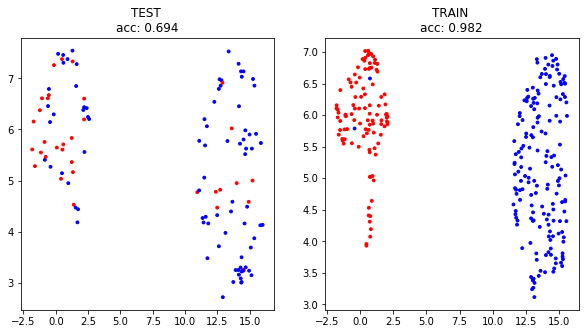


	 BASELINE: vect + pca + UMAP


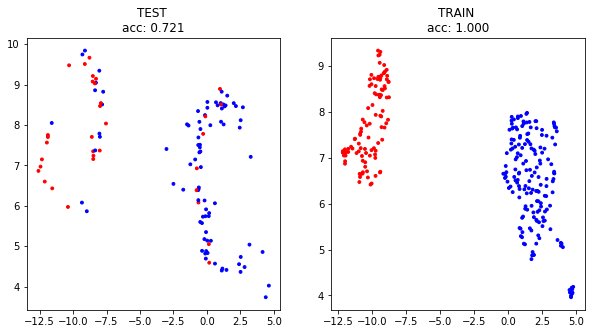

In [21]:
utilities.plot_embedding_2d(emb[0],graphs,labels,test_size = 0.3,seed = 11)
utilities.plot_embedding_2d(emb[1],graphs,labels,test_size = 0.3,seed = 11)